<a href="https://colab.research.google.com/github/Ddasunsandeepa/DeepLearning-with-Tensorflow/blob/main/01.Tensorflow_with_regression/Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [418]:
!pip install opendatasets

In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import tensorflow as tf
import numpy as np

In [420]:
od.download( "https://www.kaggle.com/datasets/andonians/random-linear-regression")

Skipping, found downloaded files in "./random-linear-regression" (use force=True to force download)


In [421]:
df = pd.read_csv("random-linear-regression/test.csv")

In [422]:
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [423]:
df.shape

(300, 2)

In [424]:
x = df['x']
y = df['y']

In [425]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [426]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


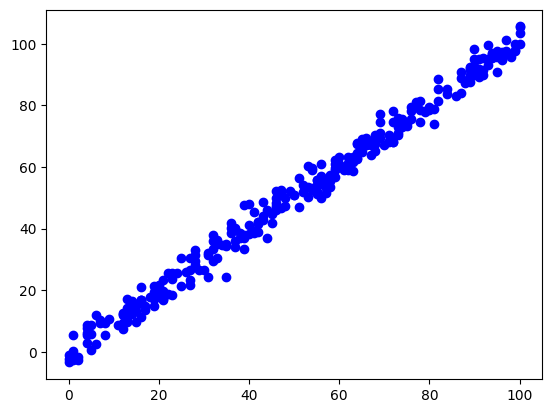

In [427]:
plt.scatter(x,y,c='b')
plt.show()

In [428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

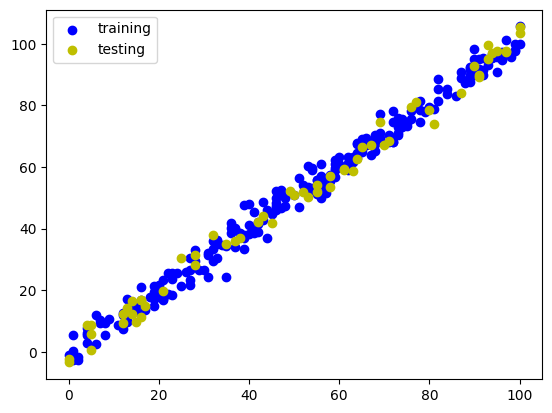

In [429]:
plt.scatter(X_train,y_train,c='b', label ="training")
plt.scatter(X_test,y_test,c='y', label ="testing")
plt.legend()
plt.show()

In [430]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [431]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [432]:
model.fit(tf.expand_dims(X_train , axis =1) , y_train , epochs=5)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 60.2128 - mae: 60.2128  
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.5225 - mae: 35.5225 
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.0336 - mae: 40.0336 
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.5520 - mae: 34.5520
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.0382 - mae: 45.0382


In [433]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791 (3.09 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [434]:
y_pred = model.predict(X_test)
y_pred[:5]
y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


(60, 1)

In [435]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


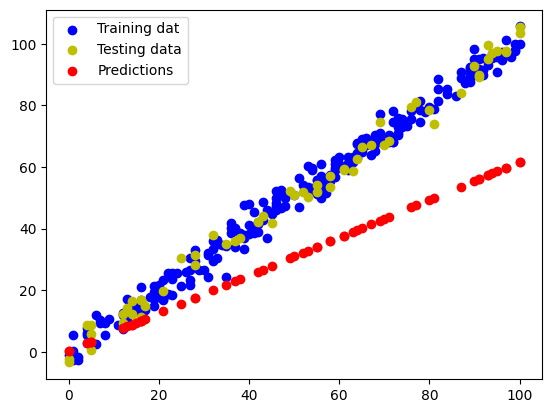

In [436]:
plt.scatter(X_train, y_train, c='b', label='Training dat')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()

plt. show()

In [437]:
model.evaluate(X_test , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 19.5053 - mae: 19.5053 


[19.392032623291016, 19.392032623291016]

In [438]:
y_pred.shape

(60, 1)

In [439]:
y_pred = model.predict(X_test).squeeze()
mae = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 19.392033892393613


In [440]:
y_pred.shape

(60,)

In [441]:

me = tf.keras.losses.MeanAbsoluteError()
result = me(y_test, y_pred).numpy()
result

np.float32(19.392035)

In [442]:

ms = tf.keras.losses.MeanSquaredError()
result = ms(y_test, y_pred).numpy()
result

np.float32(531.93787)